In [2]:
import tensorflow as tf#untuk pengembangan jaringan saraf
from tensorflow.keras import datasets, layers, utils, models, callbacks# untuk membangun, melatih, dan menguji model jaringan saraf.
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt#untuk membuat visualisasi dan plot data

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = utils.to_categorical(y_train, 10)
y_cat_test = utils.to_categorical(y_test, 10)

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2)

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 474s 296ms/step - loss: 1.6266 - accuracy: 0.4106 - precision: 0.6235 - recall: 0.2001 - val_loss: 1.2964 - val_accuracy: 0.5329 - val_precision: 0.6988 - val_recall: 0.3749
Epoch 2/50
1562/1562 [==============================] - 410s 262ms/step - loss: 1.2121 - accuracy: 0.5719 - precision: 0.7324 - recall: 0.4094 - val_loss: 1.0792 - val_accuracy: 0.6263 - val_precision: 0.7451 - val_recall: 0.5243
Epoch 3/50
1562/1562 [==============================] - 1784s 1s/step - loss: 1.0329 - accuracy: 0.6416 - precision: 0.7719 - recall: 0.5121 - val_loss: 0.8614 - val_accuracy: 0.7038 - val_precision: 0.8067 - val_recall: 0.6083
Epoch 4/50
1562/1562 [==============================] - 554s 355ms/step - loss: 0.9259 - accuracy: 0.6814 - precision: 0.7979 - recall: 0.5694 - val_loss: 0.9348 - val_accuracy: 0.6913 - val_precision: 0.7671 - val_recall: 0.6236
Epoch 5/50
1562/1562 [==============================] - 24852s 16s/step - loss: 0.

313/313 [==============================] - 24s 76ms/step - loss: 0.4144 - accuracy: 0.8629 - precision: 0.8924 - recall: 0.8419
Test Accuracy : 86.29%


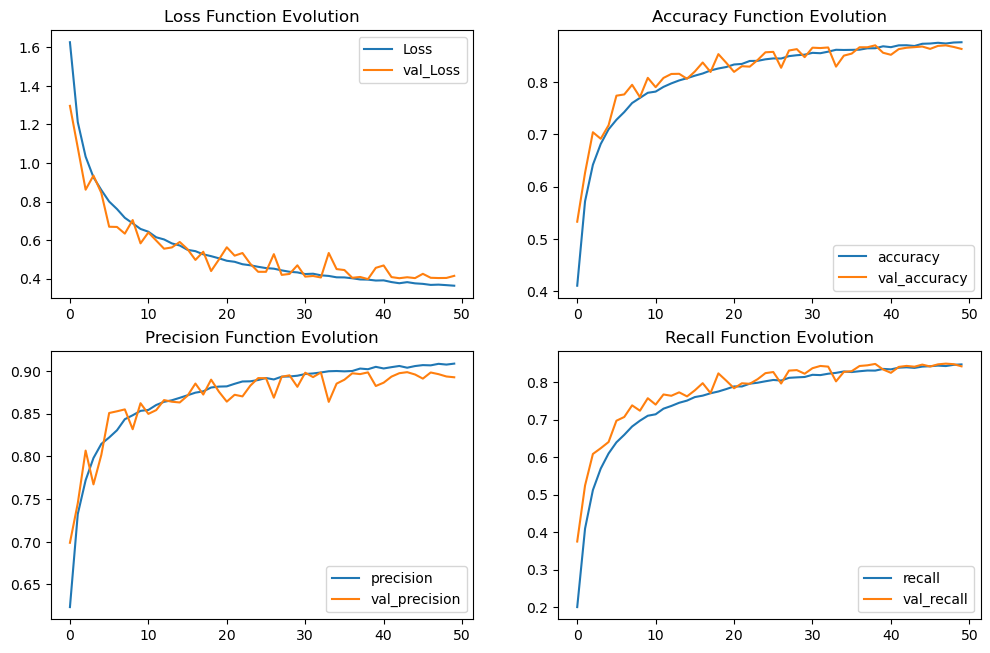

In [4]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')